<a href="https://colab.research.google.com/github/perceptronnn/shared_notebooks/blob/master/Shifted_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb

In [0]:
%matplotlib inline

In [2]:
from fastai.basics import *
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# number of examples in the training set

n = 100

In [5]:
# x contains input points
# y = w * x_ + b * 1 so x = [x_, 1] 

x = torch.ones(n, 2)
x[:, 0].uniform_(-1, 1)
x[:5]

tensor([[ 0.4914,  1.0000],
        [-0.9606,  1.0000],
        [ 0.4582,  1.0000],
        [-0.8553,  1.0000],
        [ 0.2862,  1.0000]])

In [6]:
# a is weight vector [w, b] 

a = tensor(3., 2); a

tensor([3., 2.])

In [7]:
# randomizing the actual labels around the line y = 3 * x + 2

y = x @ a + torch.rand(n)
y[:5]

tensor([ 4.3223,  0.0532,  3.5111, -0.4749,  3.2897])

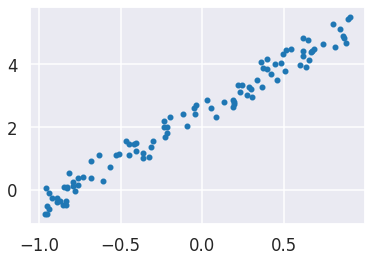

In [8]:
# plot training data

plt.scatter(x[:, 0], y, marker = '.')

In [0]:
# defining loss function - Mean Squared Error

def mse(y_hat, y): 
  return ((y_hat - y)**2).mean()

In [10]:
# starting with initial weights [-1, 1]

a = tensor(-1., 1)
y_hat = x @ a
mse(y_hat, y)

tensor(7.2054)

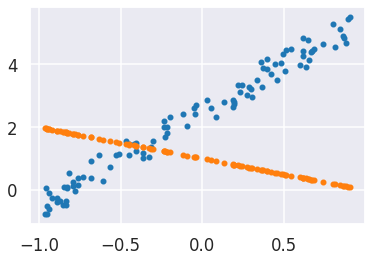

In [11]:
# plotting training data and initial regression line together

plt.scatter(x[:, 0], y, marker = '.')
plt.scatter(x[:, 0], y_hat, marker = '.')

In [12]:
a = nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
# backpropagation 

def weight_update(lr, shift):
  y_hat = x @ a

  # largest_negative_residual will contain the magnitude of largest negative residual
  largest_negative_residual = (y_hat - y).max().item()

  loss = mse(y_hat, y)
  if t % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad) 
    
    if shift:
      # after updating weights using backprop also subtract largest_negative_residual from bias
      a[1] = a[1] - largest_negative_residual

    a.grad.zero_()

In [14]:
# training without shifting

shift = False
lr = 0.1
a = tensor(-1., 1)
a = nn.Parameter(a)
for t in range(100): weight_update(lr, shift)

tensor(7.2054, grad_fn=<MeanBackward0>)
tensor(1.5022, grad_fn=<MeanBackward0>)
tensor(0.4121, grad_fn=<MeanBackward0>)
tensor(0.1579, grad_fn=<MeanBackward0>)
tensor(0.0980, grad_fn=<MeanBackward0>)
tensor(0.0838, grad_fn=<MeanBackward0>)
tensor(0.0805, grad_fn=<MeanBackward0>)
tensor(0.0797, grad_fn=<MeanBackward0>)
tensor(0.0795, grad_fn=<MeanBackward0>)
tensor(0.0795, grad_fn=<MeanBackward0>)


In [15]:
a

Parameter containing:
tensor([3.0047, 2.4953], requires_grad=True)

In [0]:
y_hat = x @ a

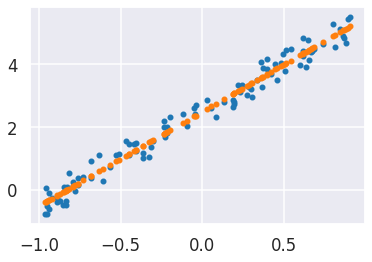

In [17]:
plt.scatter(x[:,0], y, marker = '.')
plt.scatter(x[:,0], (x @ a).detach().numpy(), marker = '.')

In [20]:
# training with shifting

shift = True
lr = 0.1
a = tensor(-1., 1)
a = nn.Parameter(a)
for t in range(200): weight_update(lr, shift)

tensor(7.2054, grad_fn=<MeanBackward0>)
tensor(5.9529, grad_fn=<MeanBackward0>)
tensor(2.2794, grad_fn=<MeanBackward0>)
tensor(1.0376, grad_fn=<MeanBackward0>)
tensor(0.5842, grad_fn=<MeanBackward0>)
tensor(0.4110, grad_fn=<MeanBackward0>)
tensor(0.3398, grad_fn=<MeanBackward0>)
tensor(0.3063, grad_fn=<MeanBackward0>)
tensor(0.2897, grad_fn=<MeanBackward0>)
tensor(0.2812, grad_fn=<MeanBackward0>)
tensor(0.2767, grad_fn=<MeanBackward0>)
tensor(0.2744, grad_fn=<MeanBackward0>)
tensor(0.2732, grad_fn=<MeanBackward0>)
tensor(0.2725, grad_fn=<MeanBackward0>)
tensor(0.2722, grad_fn=<MeanBackward0>)
tensor(0.2720, grad_fn=<MeanBackward0>)
tensor(0.2719, grad_fn=<MeanBackward0>)
tensor(0.2718, grad_fn=<MeanBackward0>)
tensor(0.2718, grad_fn=<MeanBackward0>)
tensor(0.2718, grad_fn=<MeanBackward0>)


In [21]:
a

Parameter containing:
tensor([2.9224, 2.0541], requires_grad=True)

In [0]:
y_hat = x @ a

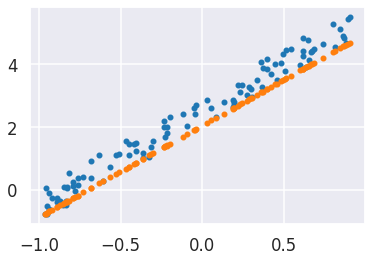

In [23]:
plt.scatter(x[:,0], y, marker = '.')
plt.scatter(x[:,0], (x @ a).detach().numpy(), marker = '.')